<a href="https://colab.research.google.com/github/nandinib1999/edureka-assignments/blob/main/Module_2_Getting_Started_with_TensorFlow_2_x_Classifying_Handwritten_digits_using_Tensorflow_2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Handwritten digits using Tensorflow 2.x

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##Problem Statement

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this demo, your goal is to correctly identify digits from a dataset of thousands of handwritten images. 

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy
- Answer: What parameters should be choosen to get best accuracy on classifying the handwritten digits?

####**Dataset Description**


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



####**Skills Gained**

- TensorFlow 2.x
- Single Layer Perceptron
- Multi Layer Perceptron
- Model Improvisation

# Solution: Classifying Handwritten digits using Tensorflow 2.x

##Installing TensorFlow 2.x

In [63]:
# !pip install tensorflow

In [1]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.4.0


##Preparing the Data

###Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [2]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


###Data Preprocessing

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [5]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape, 'train samples') 
print(X_test.shape, 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)
print(Y_train.shape)


(60000, 784) train samples
(10000, 784) test samples
(60000, 10)


## Designing the Model

###Preparing the Model 0: Single layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [69]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [70]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


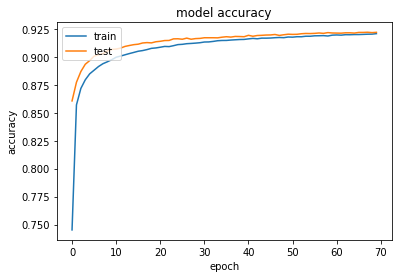

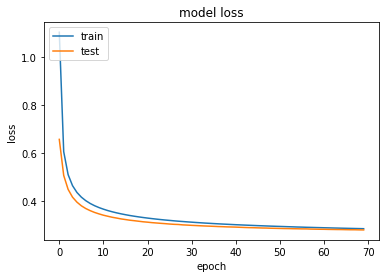

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 933us/step - loss: 0.2826 - accuracy: 0.9216
Test accuracy: 0.9215999841690063


In [74]:
model_0.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff562257ac8>>

In [75]:
model_0.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 10,
    'use_bias': True}}],
 'name': 'sequential_7'}

###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron 

In [76]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [77]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 1.6178 - accuracy: 0.5093 - val_loss: 0.4851 - val_accuracy: 0.8781
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4732 - accuracy: 0.8738 - val_loss: 0.3583 - val_accuracy: 0.9021
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3686 - accuracy: 0.8954 - val_loss: 0.3145 - val_accuracy: 0.9116
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3214 - accuracy: 0.9091 - val_loss: 0.2866 - val_accuracy: 0.9195
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.2940 - accuracy: 0.9162 - val_loss: 0.2689 - val_accuracy: 0.9250
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 0.2822 - accuracy: 0.9183 - val_loss: 0.2536 - val_accuracy: 0.9289
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.2547 - accuracy: 0.9279 - val_loss: 0.2409 - val_accuracy: 0.9317

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


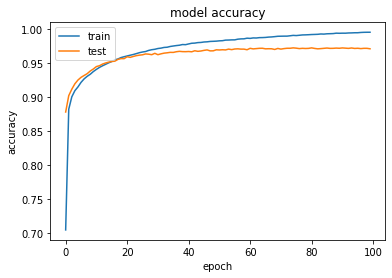

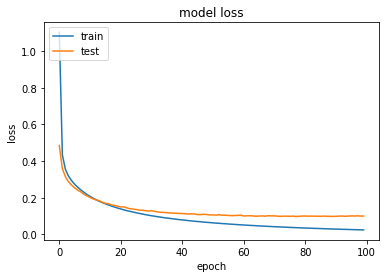

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 980us/step - loss: 0.0902 - accuracy: 0.9732
Test accuracy: 0.9732000231742859


In [81]:
model_1.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff563e3e710>>

In [82]:
model_1.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.07403497, -0.01327492, -0.0215431 , ...,  0.05213738,
          0.03403119,  0.05277386],
        [-0.00243056, -0.04893913,  0.08303294, ...,  0.01757446,
          0.0388752 , -0.01613158],
        [ 0.02541181,  0.01279866, -0.04982703, ..., -0.01710618,
         -0.06002498, -0.07652701],
        ...,
        [ 0.00825779,  0.06592666,  0.00329255, ...,  0.02973449,
          0.00264737, -0.04860768],
        [-0.04632637,  0.00496486, -0.0098914 , ..., -0.07954366,
         -0.08004918,  0.05391587],
        [ 0.03624836,  0.02914853,  0.0694829 , ..., -0.05713957,
         -0.01534002,  0.00949365]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 1.5975632e-01,  1.7636765e-02,  3.4255885e-02,  2.2696644e-02,
         7.2613552e-02, -5.0387267e-02,  1.9701968e-01, -1.5506893e-01,
         1.0575669e-01,  5.5284388e-02,  5.0836440e-02,  3.8049597e-0

In [83]:
model_1.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_i

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [84]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [85]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 1.7450 - accuracy: 0.4206 - val_loss: 0.5424 - val_accuracy: 0.8683
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.7098 - accuracy: 0.7794 - val_loss: 0.3765 - val_accuracy: 0.8963
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5337 - accuracy: 0.8396 - val_loss: 0.3156 - val_accuracy: 0.9087
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4612 - accuracy: 0.8610 - val_loss: 0.2817 - val_accuracy: 0.9176
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4140 - accuracy: 0.8778 - val_loss: 0.2590 - val_accuracy: 0.9237
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3772 - accuracy: 0.8883 - val_loss: 0.2402 - val_accuracy: 0.9290
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3584 - accuracy: 0.8954 - val_loss: 0.2270 - val_accuracy: 0.9325
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


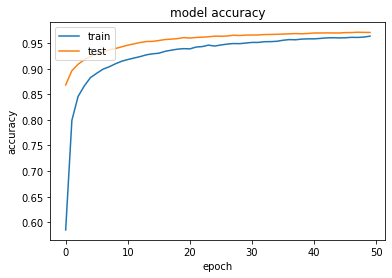

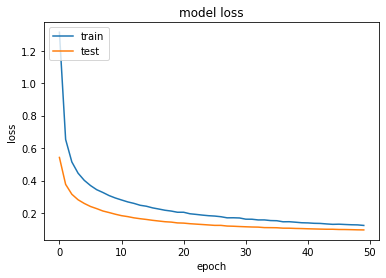

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [88]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0890 - accuracy: 0.9736
Test accuracy: 0.9735999703407288


In [89]:
model_2.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff5620332e8>>

In [90]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.0286034 , -0.05114236,  0.05718037, ...,  0.03779216,
         -0.04953378,  0.01739182],
        [ 0.03118347, -0.02715999,  0.05417847, ..., -0.00927445,
         -0.0641031 , -0.07366098],
        [ 0.04823635, -0.00918885, -0.0178913 , ...,  0.04790965,
          0.01488219, -0.0201401 ],
        ...,
        [ 0.00231667,  0.06358822, -0.05123588, ..., -0.0173158 ,
         -0.05920044, -0.06624801],
        [-0.04682816, -0.06164982,  0.009974  , ...,  0.03070732,
          0.05698448,  0.04061755],
        [ 0.0625676 ,  0.00634991, -0.0302334 , ...,  0.03144823,
         -0.0242323 ,  0.06805993]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([-1.28234169e-02,  3.68233398e-02, -2.39244401e-02,  2.31216699e-01,
        -4.30502146e-02,  4.68869647e-03, -1.42683424e-02, -1.06768787e-01,
         1.77313127e-02,  7.88301751e-02, -1.21813476e-01, 

In [91]:
model_2.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_11',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constr

###Improved Model 3: Changing the Optimizer - Adam

In [92]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [93]:
# Compiling the model.
model_3.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2) 


Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 1.1240 - accuracy: 0.6293 - val_loss: 0.2357 - val_accuracy: 0.9297
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3521 - accuracy: 0.8977 - val_loss: 0.1837 - val_accuracy: 0.9456
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2903 - accuracy: 0.9165 - val_loss: 0.1594 - val_accuracy: 0.9523
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2471 - accuracy: 0.9256 - val_loss: 0.1457 - val_accuracy: 0.9572
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2228 - accuracy: 0.9357 - val_loss: 0.1366 - val_accuracy: 0.9617
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2002 - accuracy: 0.9414 - val_loss: 0.1297 - val_accuracy: 0.9617
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1878 - accuracy: 0.9433 - val_loss: 0.1200 - val_accuracy: 0.9645
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


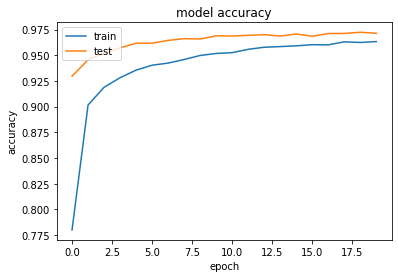

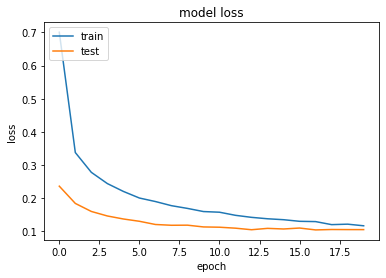

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [96]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9733
Test accuracy: 0.9732999801635742


In [97]:
model_3.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff56207c0f0>>

In [98]:
model_3.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.04903625, -0.05087169,  0.07054306, ..., -0.03392486,
         -0.08204974, -0.05097425],
        [-0.04531375,  0.00070772, -0.04914172, ...,  0.06870625,
         -0.02831851, -0.02830182],
        [-0.04385743, -0.04335676,  0.03229182, ...,  0.03729825,
         -0.04275351,  0.07028461],
        ...,
        [-0.05605123, -0.02060861,  0.00186371, ..., -0.05341776,
         -0.03581965, -0.0380997 ],
        [ 0.01767389,  0.03509269, -0.08159025, ...,  0.07482184,
          0.0290833 ,  0.01281687],
        [ 0.06359506,  0.04361745, -0.06647248, ..., -0.04263822,
          0.036466  ,  0.06750544]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.11544956,  0.04768309, -0.00904071,  0.15282114, -0.0194946 ,
         0.03190538,  0.12491963,  0.00100335,  0.11388763, -0.00838856,
         0.05497944,  0.05854667,  0.01268   ,  0.01234861,  0.1077

In [99]:
model_3.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_13',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

###Improved Model 4: Increasing the number of Hidden Layer neuron 

In [100]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [101]:
# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2) 


Epoch 1/31
375/375 [==============================] - 6s 16ms/step - loss: 0.5430 - accuracy: 0.8335 - val_loss: 0.1247 - val_accuracy: 0.9633
Epoch 2/31
375/375 [==============================] - 6s 15ms/step - loss: 0.1344 - accuracy: 0.9589 - val_loss: 0.0913 - val_accuracy: 0.9737
Epoch 3/31
375/375 [==============================] - 6s 15ms/step - loss: 0.0879 - accuracy: 0.9722 - val_loss: 0.0808 - val_accuracy: 0.9758
Epoch 4/31
375/375 [==============================] - 6s 15ms/step - loss: 0.0725 - accuracy: 0.9769 - val_loss: 0.0845 - val_accuracy: 0.9743
Epoch 5/31
375/375 [==============================] - 6s 15ms/step - loss: 0.0559 - accuracy: 0.9814 - val_loss: 0.0795 - val_accuracy: 0.9779
Epoch 6/31
375/375 [==============================] - 6s 15ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0814 - val_accuracy: 0.9771
Epoch 7/31
375/375 [==============================] - 6s 16ms/step - loss: 0.0425 - accuracy: 0.9857 - val_loss: 0.0707 - val_accuracy: 0.9804

In [103]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0946 - accuracy: 0.9819
Test accuracy: 0.9818999767303467


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


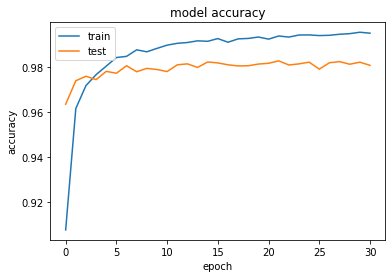

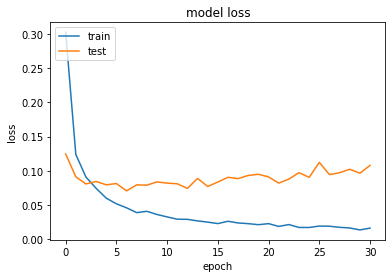

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [105]:
model_4.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff564f55d30>>

In [106]:
model_4.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.01991449, -0.02107704, -0.02624645, ...,  0.01357347,
         -0.02441422, -0.00249566],
        [-0.00623186,  0.06733239, -0.04089314, ...,  0.06436962,
          0.03007748,  0.02608287],
        [ 0.0197171 ,  0.0035797 , -0.01243343, ...,  0.0310188 ,
          0.04794245, -0.06205278],
        ...,
        [ 0.03366051, -0.01533755,  0.01254298, ...,  0.01123859,
          0.02057166,  0.04792221],
        [ 0.00382269, -0.02948751, -0.00129434, ..., -0.01032924,
         -0.01643234,  0.00351997],
        [-0.06555173, -0.0085438 ,  0.0592088 , ...,  0.06698906,
         -0.02777758,  0.04965511]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.17461385, -0.04273822, -0.0524603 ,  0.09914917, -0.03911138,
         0.0395376 ,  0.02489801, -0.03067326,  0.05088372, -0.027612  ,
        -0.00092727, -0.11056437, -0.04922795, -0.07242209, -0.03

In [107]:
model_4.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_15',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constr

###Improved Model 5: Manipulating the batch size

In [108]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [109]:
# Compiling the model.
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [110]:
# Training the model. 
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 


Epoch 1/30
750/750 [==============================] - 8s 10ms/step - loss: 0.4636 - accuracy: 0.8578 - val_loss: 0.1128 - val_accuracy: 0.9653
Epoch 2/30
750/750 [==============================] - 8s 11ms/step - loss: 0.1246 - accuracy: 0.9626 - val_loss: 0.0970 - val_accuracy: 0.9709
Epoch 3/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0936 - accuracy: 0.9706 - val_loss: 0.0888 - val_accuracy: 0.9731
Epoch 4/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0740 - accuracy: 0.9756 - val_loss: 0.0883 - val_accuracy: 0.9743
Epoch 5/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0615 - accuracy: 0.9814 - val_loss: 0.0844 - val_accuracy: 0.9765
Epoch 6/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0777 - val_accuracy: 0.9783
Epoch 7/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0488 - accuracy: 0.9842 - val_loss: 0.0855 - val_accuracy: 0.9755

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


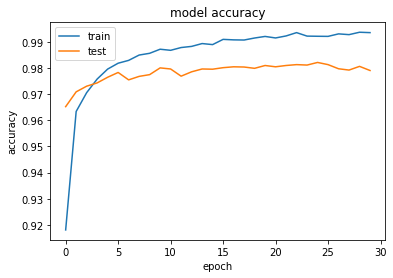

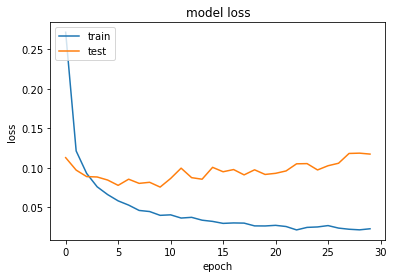

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [112]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1061 - accuracy: 0.9794
Test accuracy: 0.9793999791145325


In [113]:
model_5.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff55abb8ba8>>

In [114]:
model_5.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.04501593, -0.03110533,  0.01885758, ..., -0.04065344,
          0.0437548 , -0.0431143 ],
        [ 0.06238841, -0.05596947, -0.007042  , ...,  0.05595745,
          0.05736338,  0.00088546],
        [-0.00513218,  0.01325794,  0.05625425, ..., -0.04944514,
         -0.00384706,  0.00569188],
        ...,
        [-0.0372543 , -0.05129962, -0.03699202, ..., -0.00111204,
         -0.04881969,  0.00471788],
        [ 0.02902982, -0.05179378,  0.02468473, ...,  0.01204246,
         -0.0074122 , -0.02557557],
        [ 0.00764053, -0.05810339, -0.04273617, ..., -0.0236135 ,
         -0.00040488,  0.01676451]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.16648619,  0.05142016, -0.03694009, -0.0846366 ,  0.00746855,
        -0.06403369,  0.07286596,  0.06411461, -0.05701706,  0.10920586,
        -0.05424039,  0.0774123 , -0.11808036, -0.13826036, -0.11

In [115]:
model_5.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_17',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constr

###Improved Model 6: Adding Another Hidden Layer to the Model

In [6]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [7]:
# Compiling the model.
from tensorflow.keras.optimizers import RMSprop
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001) 
model_6.compile(optimizer=rms, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 

Epoch 1/30
750/750 [==============================] - 14s 18ms/step - loss: 1.0805 - accuracy: 0.6723 - val_loss: 0.2328 - val_accuracy: 0.9312
Epoch 2/30
750/750 [==============================] - 13s 17ms/step - loss: 0.2956 - accuracy: 0.9130 - val_loss: 0.1670 - val_accuracy: 0.9506
Epoch 3/30
750/750 [==============================] - 13s 17ms/step - loss: 0.2017 - accuracy: 0.9396 - val_loss: 0.1316 - val_accuracy: 0.9609
Epoch 4/30
750/750 [==============================] - 13s 17ms/step - loss: 0.1593 - accuracy: 0.9517 - val_loss: 0.1200 - val_accuracy: 0.9638
Epoch 5/30
750/750 [==============================] - 13s 18ms/step - loss: 0.1359 - accuracy: 0.9599 - val_loss: 0.1063 - val_accuracy: 0.9682
Epoch 6/30
750/750 [==============================] - 13s 18ms/step - loss: 0.1177 - accuracy: 0.9651 - val_loss: 0.1002 - val_accuracy: 0.9707
Epoch 7/30
750/750 [==============================] - 13s 18ms/step - loss: 0.1001 - accuracy: 0.9694 - val_loss: 0.0952 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


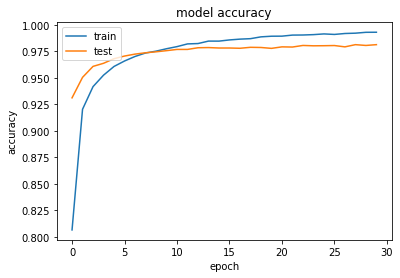

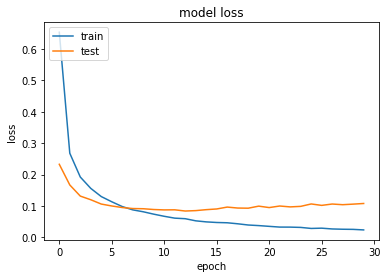

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [120]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.9813
Test accuracy: 0.9812999963760376


In [31]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2093 - accuracy: 0.9806
Test accuracy: 0.9805999994277954


In [10]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0848 - accuracy: 0.9832
Test accuracy: 0.9832000136375427


In [121]:
model_6.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff561efcc50>>

In [122]:
model_6.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.00779489,  0.05264565, -0.04012489, ...,  0.06708941,
          0.01314764, -0.05560321],
        [ 0.06429355,  0.0392572 , -0.00048401, ...,  0.03063911,
          0.06509098,  0.05561216],
        [-0.03143863, -0.03088088,  0.04031672, ..., -0.04194895,
         -0.05073034, -0.03668135],
        ...,
        [-0.06257217,  0.05477249,  0.04145724, ...,  0.05411057,
          0.02363078,  0.00166178],
        [-0.04055847, -0.04683935, -0.038934  , ..., -0.01389134,
          0.06407249, -0.01095496],
        [-0.02225298,  0.03627384,  0.0219906 , ...,  0.01508933,
          0.05078076,  0.01383059]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.24483213, -0.06707662,  0.11436531,  0.02019304, -0.09745172,
         0.08652004, -0.03107469,  0.04693902,  0.00783715, -0.0170225 ,
        -0.09023979,  0.08990443, -0.14378422, -0.07657437, -0.03

In [123]:
model_6.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_19',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constr

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with TensorFlow. It is important to get hands-on experience with TensorFlow in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.


###**`.ipynb file 1`** 


**Marks: 10**
> - Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
- What is the effect of adding more neurons to each hidden layer?
- What happens if we manipulate the value of dropout?
- What is the effect of adding more hidden layer to the network?
- What is the accuracy score if we use RMSprop for model 6?
- Does manipulating the learning rate affect the model? Justify your answer.
- What is the best parameter configuration for this project?


#### **ANSWERS**

* No, it varies. Sometimes it gets better, sometimes it gets worse.

* It can improve the results as the model has more units to extract features from the input. However, adding too many neurons in the hidden layers can lead to overfitting.

* It can improve the validation accuracy as dropout avoids overfitting but we have to be careful to not use too high dropout or else our model won't be able to learn effectively.

* It can improve the results as the model is more dense. However, adding too many hidden layers can lead to overfitting so we have to be careful.

* Using RMSProp as optimizer reduced the validation accuracy of the model 6 and the loss increased during the last epochs which is highly undesirable.

* Yes, on decreasing the lr from 0.001 to 0.0001, the validation accuracy increased. If the LR is too large, the gradient descent can overshoot and if the LR is too small, the gradient descent can be very slow.

* Best Configuration = 2 hidden layers with 512 units, dropout = 0.3, batch_size = 64, lr = 0.0001, optimizer = RMSProp, epochs = 30.

###**`.ipynb file 2`** 


**Marks: 15**
>- Try improving the model and re-code the program from scratch without looking too much at this source-code.
- Write up a summary explaining how your program works.


In [1]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.4.0


In [11]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [12]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [13]:
RESHAPE = 784
X_train = X_train.reshape(60000, RESHAPE) 
X_test = X_test.reshape(10000, RESHAPE) 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

X_train /= 255
X_test /= 255

In [14]:
print("There are ", X_train.shape, 'train samples') 
print("There are ", X_test.shape, 'test samples') 

There are  (60000, 784) train samples
There are  (10000, 784) test samples


In [15]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [16]:
Y_train.shape

(60000, 10)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import Sequential

model_new = Sequential()
model_new.add(Dense(512, input_shape=(784,)))
model_new.add(Activation('relu'))                            
model_new.add(Dropout(0.2))

model_new.add(Dense(512))
model_new.add(Activation('relu'))
model_new.add(Dropout(0.2))

model_new.add(Dense(10))
model_new.add(Activation('softmax'))

In [20]:
# Compiling the model.
model_new.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Training the model. 
training = model_new.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test)) 

Epoch 1/20
469/469 [==============================] - 9s 17ms/step - loss: 0.4460 - accuracy: 0.8657 - val_loss: 0.1059 - val_accuracy: 0.9680
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1052 - accuracy: 0.9667 - val_loss: 0.0822 - val_accuracy: 0.9736
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0699 - accuracy: 0.9783 - val_loss: 0.0664 - val_accuracy: 0.9790
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0516 - accuracy: 0.9832 - val_loss: 0.0725 - val_accuracy: 0.9788
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0611 - val_accuracy: 0.9814
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.0642 - val_accuracy: 0.9820
Epoch 7/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0327 - accuracy: 0.9890 - val_loss: 0.0759 - val_accuracy: 0.9788

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


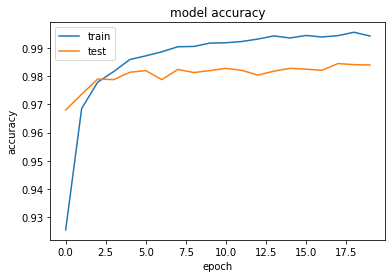

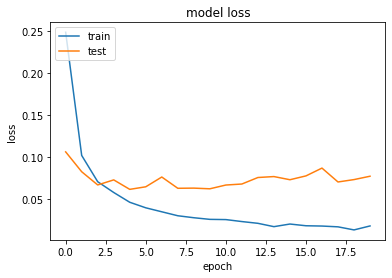

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
#evaluate the model
test_loss, test_acc = model_new.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0768 - accuracy: 0.9840
Test accuracy: 0.984000027179718


In [25]:
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

As you may see the new model did marginally imporve the evaluation results from **0.9812** to **0.9840**.

**Working of the Notebook**

* It is fairly simple. We first import the tensorflow library and load the dataset into X, Y variables for training and test. 

* Then we reshape the training and test X to 784 (28x28) so that we can feed it into our neural network.

* We also need to convert the pixel values to float before normaling the pixels by dividing it by 255.

* Since our output column is a categorical variable, we will have to encode them before feeding to the neural network.

* We will then define our neural network using Dense Layers and Dropouts. We have one Dense layer with 512 hidden units and one input and output layers each with 512 and 10 hidden units respectively.

* We are using the activation function "relu" for the hidden layers and "softmax" function for the output layer. The dropout value for all the Dropout layers is 0.2.

* For optimizer, we are using "Adam" and cross_entropy as loss function for the backpropogation.

* With a batch size 128, we train the model for 20 epochs.

###**`.ipynb file 3`**



**Marks: 25**
>**Problem Statement**<br>
The dataset is similar to MNIST, but includes images of certain clothing and accessory. The objective is to classify images into specific classes using single layer perceptron and multilayer perceptron.<br>
<br>
**Dataset Description**
- Total Images: 70,000 
- Train Images: 60,000 
- Test Images: 10,000 
- Image Size: 28 X 28 
- Classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot' 

>**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:
- Prepare a detailed python notebook(similar to this one) using muli-layer perceptron for classifing the images from [MNIST Fashion Dataset ](https://github.com/zalandoresearch/fashion-mnist) with best accuracy
- Prepare the dataset for the model
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy

**Answer:** What parameters should be choosen to get best accuracy on classifying the images into various categories?
 

In [11]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


#### Loading the data and visualize it

In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
print("Train Data has "+str(len(train_images))+" images")
print("Test Data has "+str(len(test_images))+" images")

Train Data has 60000 images
Test Data has 10000 images


In [14]:
unique_labels = set(train_labels)
print(unique_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


From the internet sources, I was got to know the actual class names for every label above.

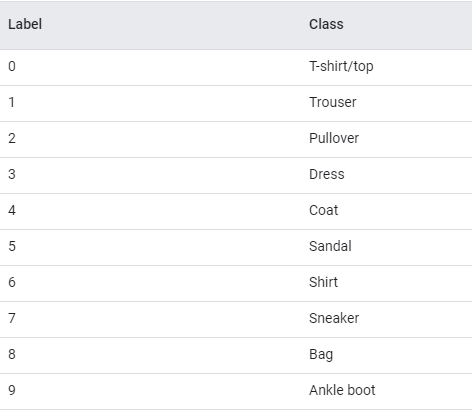

In [15]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

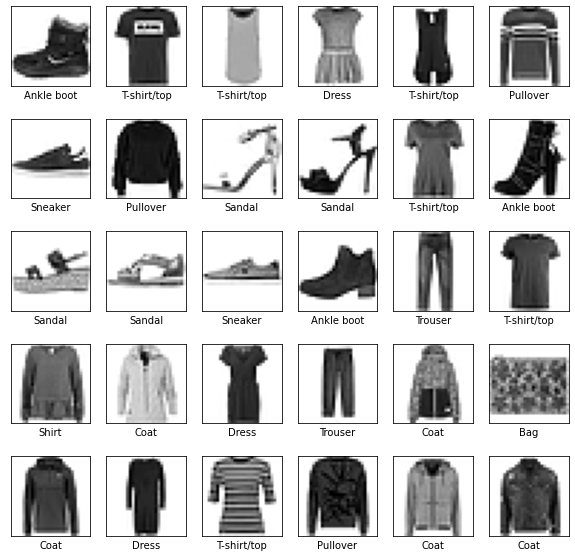

In [16]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_labels[train_labels[i]])
plt.show()

In [17]:
# Normalizing the images before feeding them to neural network
SHAPE = 784 # 28x28 = 784 neurons
train_images = train_images.reshape(60000, SHAPE) 
test_images = test_images.reshape(10000, SHAPE) 

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.astype('float32')
test_images = test_images.astype('float32') 

In [18]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

#### Single Layer Perceptron

In [40]:
model_single = Sequential()
model_single.add(Dense(10, input_shape=(784,), name='dense_layer', activation='softmax')) 

In [41]:
model_single.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model_single.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [43]:
train_images.shape

(60000, 784)

In [19]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10) 
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [44]:
train_labels.shape

(60000, 10)

In [45]:
# Training the model. 
training = model_single.fit(train_images, train_labels, batch_size=64, epochs=60, validation_split=0.25) 

Epoch 1/60
704/704 [==============================] - 2s 2ms/step - loss: 0.9271 - accuracy: 0.6953 - val_loss: 0.5424 - val_accuracy: 0.8133
Epoch 2/60
704/704 [==============================] - 1s 2ms/step - loss: 0.5147 - accuracy: 0.8289 - val_loss: 0.4944 - val_accuracy: 0.8298
Epoch 3/60
704/704 [==============================] - 1s 2ms/step - loss: 0.4721 - accuracy: 0.8391 - val_loss: 0.4599 - val_accuracy: 0.8449
Epoch 4/60
704/704 [==============================] - 1s 2ms/step - loss: 0.4477 - accuracy: 0.8490 - val_loss: 0.4466 - val_accuracy: 0.8448
Epoch 5/60
704/704 [==============================] - 1s 2ms/step - loss: 0.4320 - accuracy: 0.8538 - val_loss: 0.4401 - val_accuracy: 0.8495
Epoch 6/60
704/704 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.8567 - val_loss: 0.4329 - val_accuracy: 0.8524
Epoch 7/60
704/704 [==============================] - 1s 2ms/step - loss: 0.4140 - accuracy: 0.8591 - val_loss: 0.4276 - val_accuracy: 0.8533
Epoch 

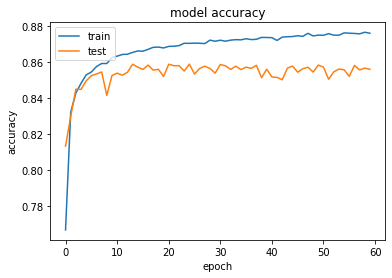

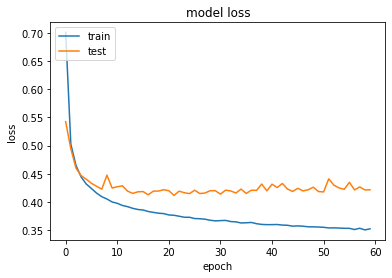

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
#evaluate the model
test_loss, test_acc = model_single.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 937us/step - loss: 0.4519 - accuracy: 0.8445
Test accuracy: 0.8445000052452087


#### Multi-layer Perceptron with Dropout

In [41]:
from tensorflow.keras.layers import Dropout

model_multi = tf.keras.Sequential()
model_multi.add(Dense(128, name='dense_layer', input_shape=(784,), activation = 'relu'))
model_multi.add(Dropout(0.2))
model_multi.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [42]:
model_multi.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
# Training the model. 
training = model_multi.fit(train_images, train_labels, batch_size=64, epochs=60, validation_split=0.25) 

Epoch 1/60
704/704 [==============================] - 3s 3ms/step - loss: 0.7575 - accuracy: 0.7404 - val_loss: 0.4237 - val_accuracy: 0.8500
Epoch 2/60
704/704 [==============================] - 2s 3ms/step - loss: 0.4397 - accuracy: 0.8426 - val_loss: 0.4124 - val_accuracy: 0.8469
Epoch 3/60
704/704 [==============================] - 2s 3ms/step - loss: 0.3908 - accuracy: 0.8594 - val_loss: 0.3612 - val_accuracy: 0.8696
Epoch 4/60
704/704 [==============================] - 2s 3ms/step - loss: 0.3645 - accuracy: 0.8693 - val_loss: 0.3527 - val_accuracy: 0.8728
Epoch 5/60
704/704 [==============================] - 2s 3ms/step - loss: 0.3469 - accuracy: 0.8725 - val_loss: 0.3392 - val_accuracy: 0.8775
Epoch 6/60
704/704 [==============================] - 2s 3ms/step - loss: 0.3292 - accuracy: 0.8807 - val_loss: 0.3418 - val_accuracy: 0.8765
Epoch 7/60
704/704 [==============================] - 2s 3ms/step - loss: 0.3153 - accuracy: 0.8832 - val_loss: 0.3353 - val_accuracy: 0.8805
Epoch 

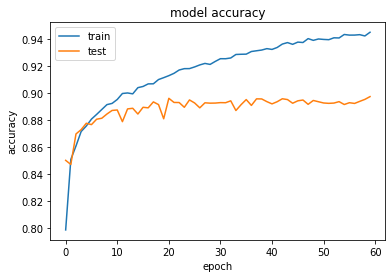

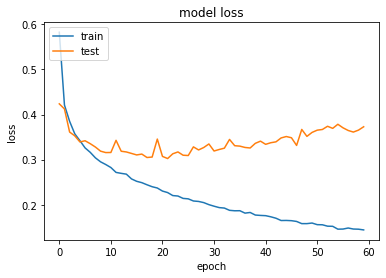

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
#evaluate the model
test_loss, test_acc = model_multi.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8925
Test accuracy: 0.8924999833106995


#### Multi-layer perceptron - 2 hidden layers

In [46]:
model_multi_2 = tf.keras.Sequential()
model_multi_2.add(Dense(256, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
model_multi_2.add(Dropout(0.3))
model_multi_2.add(Dense(128, name='dense_layer_2', activation = 'relu'))
model_multi_2.add(Dropout(0.3))
model_multi_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [47]:
model_multi_2.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
# Training the model. 
training = model_multi_2.fit(train_images, train_labels, batch_size=64, epochs=50, validation_split=0.25) 

Epoch 1/50
704/704 [==============================] - 4s 6ms/step - loss: 0.8236 - accuracy: 0.7072 - val_loss: 0.4456 - val_accuracy: 0.8341
Epoch 2/50
704/704 [==============================] - 4s 5ms/step - loss: 0.4627 - accuracy: 0.8342 - val_loss: 0.3780 - val_accuracy: 0.8641
Epoch 3/50
704/704 [==============================] - 3s 5ms/step - loss: 0.4078 - accuracy: 0.8515 - val_loss: 0.3567 - val_accuracy: 0.8673
Epoch 4/50
704/704 [==============================] - 4s 5ms/step - loss: 0.3885 - accuracy: 0.8573 - val_loss: 0.3630 - val_accuracy: 0.8674
Epoch 5/50
704/704 [==============================] - 4s 5ms/step - loss: 0.3635 - accuracy: 0.8678 - val_loss: 0.3439 - val_accuracy: 0.8742
Epoch 6/50
704/704 [==============================] - 4s 5ms/step - loss: 0.3540 - accuracy: 0.8705 - val_loss: 0.3346 - val_accuracy: 0.8793
Epoch 7/50
704/704 [==============================] - 4s 5ms/step - loss: 0.3434 - accuracy: 0.8745 - val_loss: 0.3310 - val_accuracy: 0.8819
Epoch 

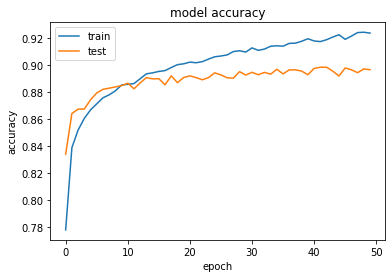

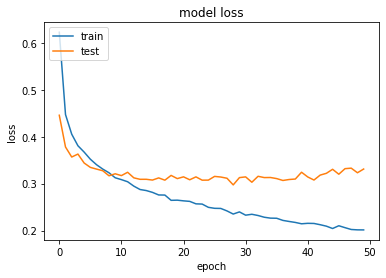

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
#evaluate the model
test_loss, test_acc = model_multi_2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8893
Test accuracy: 0.8892999887466431


#### Different Optimizer

In [54]:
from tensorflow.keras.layers import Dropout

model_multi_3 = tf.keras.Sequential()
model_multi_3.add(Dense(256, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
model_multi_3.add(Dropout(0.3))
model_multi_3.add(Dense(256, name='dense_layer_2', activation = 'relu'))
model_multi_3.add(Dropout(0.3))
model_multi_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [55]:
model_multi_3.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
# Training the model. 
training = model_multi_3.fit(train_images, train_labels, batch_size=64, epochs=50, validation_split=0.25) 

Epoch 1/50
704/704 [==============================] - 4s 6ms/step - loss: 1.5085 - accuracy: 0.4823 - val_loss: 0.7015 - val_accuracy: 0.7504
Epoch 2/50
704/704 [==============================] - 4s 5ms/step - loss: 0.7791 - accuracy: 0.7249 - val_loss: 0.5845 - val_accuracy: 0.7954
Epoch 3/50
704/704 [==============================] - 4s 5ms/step - loss: 0.6433 - accuracy: 0.7767 - val_loss: 0.5364 - val_accuracy: 0.8101
Epoch 4/50
704/704 [==============================] - 4s 5ms/step - loss: 0.5897 - accuracy: 0.7979 - val_loss: 0.4962 - val_accuracy: 0.8251
Epoch 5/50
704/704 [==============================] - 4s 5ms/step - loss: 0.5479 - accuracy: 0.8106 - val_loss: 0.4818 - val_accuracy: 0.8291
Epoch 6/50
704/704 [==============================] - 4s 5ms/step - loss: 0.5218 - accuracy: 0.8182 - val_loss: 0.4536 - val_accuracy: 0.8389
Epoch 7/50
704/704 [==============================] - 4s 5ms/step - loss: 0.5010 - accuracy: 0.8265 - val_loss: 0.4632 - val_accuracy: 0.8320
Epoch 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_multi_3.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

### Increasing the number of units in the hidden layers

In [20]:
from tensorflow.keras.layers import Dropout

model_multi_4 = tf.keras.Sequential()
model_multi_4.add(Dense(512, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
model_multi_4.add(Dropout(0.3))
model_multi_4.add(Dense(512, name='dense_layer_2', activation = 'relu'))
model_multi_4.add(Dropout(0.3))
model_multi_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [21]:
model_multi_4.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Training the model. 
training = model_multi_4.fit(train_images, train_labels, batch_size=64, epochs=50, validation_split=0.25) 

Epoch 1/50
704/704 [==============================] - 9s 12ms/step - loss: 0.7291 - accuracy: 0.7380 - val_loss: 0.4371 - val_accuracy: 0.8330
Epoch 2/50
704/704 [==============================] - 8s 11ms/step - loss: 0.4274 - accuracy: 0.8442 - val_loss: 0.3725 - val_accuracy: 0.8617
Epoch 3/50
704/704 [==============================] - 8s 11ms/step - loss: 0.3937 - accuracy: 0.8546 - val_loss: 0.3883 - val_accuracy: 0.8515
Epoch 4/50
704/704 [==============================] - 8s 11ms/step - loss: 0.3652 - accuracy: 0.8648 - val_loss: 0.3434 - val_accuracy: 0.8759
Epoch 5/50
704/704 [==============================] - 8s 12ms/step - loss: 0.3515 - accuracy: 0.8712 - val_loss: 0.3515 - val_accuracy: 0.8716
Epoch 6/50
704/704 [==============================] - 8s 11ms/step - loss: 0.3408 - accuracy: 0.8733 - val_loss: 0.3300 - val_accuracy: 0.8783
Epoch 7/50
704/704 [==============================] - 8s 11ms/step - loss: 0.3234 - accuracy: 0.8802 - val_loss: 0.3213 - val_accuracy: 0.8819

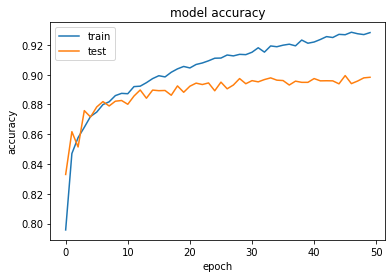

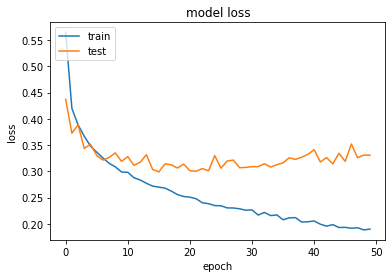

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
#evaluate the model
test_loss, test_acc = model_multi_4.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3659 - accuracy: 0.8914
Test accuracy: 0.8913999795913696


### Changing the batch_size

In [29]:
from tensorflow.keras.layers import Dropout

model_multi_5 = tf.keras.Sequential()
model_multi_5.add(Dense(512, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
model_multi_5.add(Dropout(0.3))
model_multi_5.add(Dense(512, name='dense_layer_2', activation = 'relu'))
model_multi_5.add(Dropout(0.3))
model_multi_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [30]:
model_multi_5.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Training the model. 
training = model_multi_5.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split=0.25) 

Epoch 1/30
352/352 [==============================] - 7s 17ms/step - loss: 0.7598 - accuracy: 0.7308 - val_loss: 0.4236 - val_accuracy: 0.8420
Epoch 2/30
352/352 [==============================] - 6s 17ms/step - loss: 0.4257 - accuracy: 0.8439 - val_loss: 0.3759 - val_accuracy: 0.8631
Epoch 3/30
352/352 [==============================] - 6s 17ms/step - loss: 0.3853 - accuracy: 0.8600 - val_loss: 0.3523 - val_accuracy: 0.8721
Epoch 4/30
352/352 [==============================] - 6s 17ms/step - loss: 0.3504 - accuracy: 0.8706 - val_loss: 0.3478 - val_accuracy: 0.8733
Epoch 5/30
352/352 [==============================] - 6s 18ms/step - loss: 0.3370 - accuracy: 0.8754 - val_loss: 0.3341 - val_accuracy: 0.8762
Epoch 6/30
352/352 [==============================] - 6s 17ms/step - loss: 0.3290 - accuracy: 0.8767 - val_loss: 0.3224 - val_accuracy: 0.8833
Epoch 7/30
352/352 [==============================] - 6s 17ms/step - loss: 0.3132 - accuracy: 0.8821 - val_loss: 0.3183 - val_accuracy: 0.8862

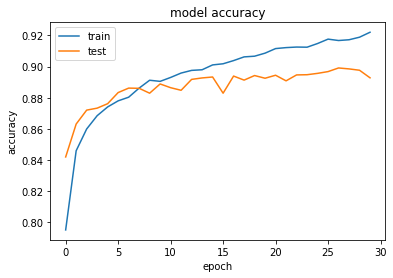

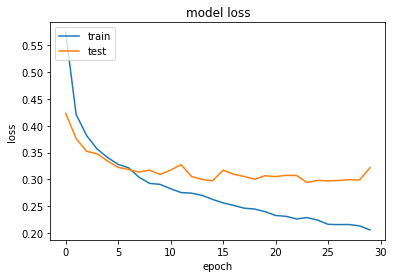

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
#evaluate the model
test_loss, test_acc = model_multi_5.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8851
Test accuracy: 0.8851000070571899


### Adding one more hidden layer

In [35]:
from tensorflow.keras.layers import Dropout

model_multi_6 = tf.keras.Sequential()
model_multi_6.add(Dense(512, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
model_multi_6.add(Dropout(0.3))
model_multi_6.add(Dense(512, name='dense_layer_2', activation = 'relu'))
model_multi_6.add(Dropout(0.3))
model_multi_6.add(Dense(512, name='dense_layer_3', activation = 'relu'))
model_multi_6.add(Dropout(0.3))
model_multi_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))

In [36]:
model_multi_6.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Training the model. 
training = model_multi_6.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split=0.25) 

Epoch 1/30
352/352 [==============================] - 9s 24ms/step - loss: 0.8052 - accuracy: 0.7072 - val_loss: 0.4271 - val_accuracy: 0.8457
Epoch 2/30
352/352 [==============================] - 8s 24ms/step - loss: 0.4408 - accuracy: 0.8412 - val_loss: 0.3678 - val_accuracy: 0.8641
Epoch 3/30
352/352 [==============================] - 8s 24ms/step - loss: 0.3887 - accuracy: 0.8579 - val_loss: 0.3674 - val_accuracy: 0.8665
Epoch 4/30
352/352 [==============================] - 9s 24ms/step - loss: 0.3793 - accuracy: 0.8619 - val_loss: 0.3517 - val_accuracy: 0.8735
Epoch 5/30
352/352 [==============================] - 8s 23ms/step - loss: 0.3556 - accuracy: 0.8698 - val_loss: 0.3366 - val_accuracy: 0.8773
Epoch 6/30
352/352 [==============================] - 8s 23ms/step - loss: 0.3421 - accuracy: 0.8743 - val_loss: 0.3435 - val_accuracy: 0.8744
Epoch 7/30
352/352 [==============================] - 8s 23ms/step - loss: 0.3306 - accuracy: 0.8778 - val_loss: 0.3367 - val_accuracy: 0.8757

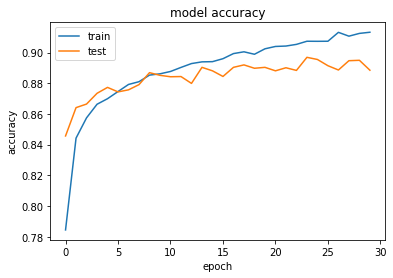

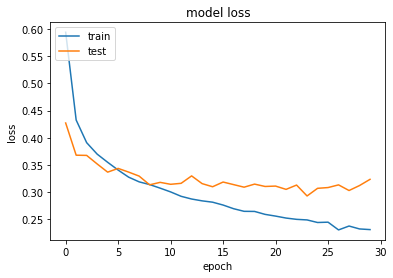

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
#evaluate the model
test_loss, test_acc = model_multi_6.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3523 - accuracy: 0.8793
Test accuracy: 0.8792999982833862
